Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; re

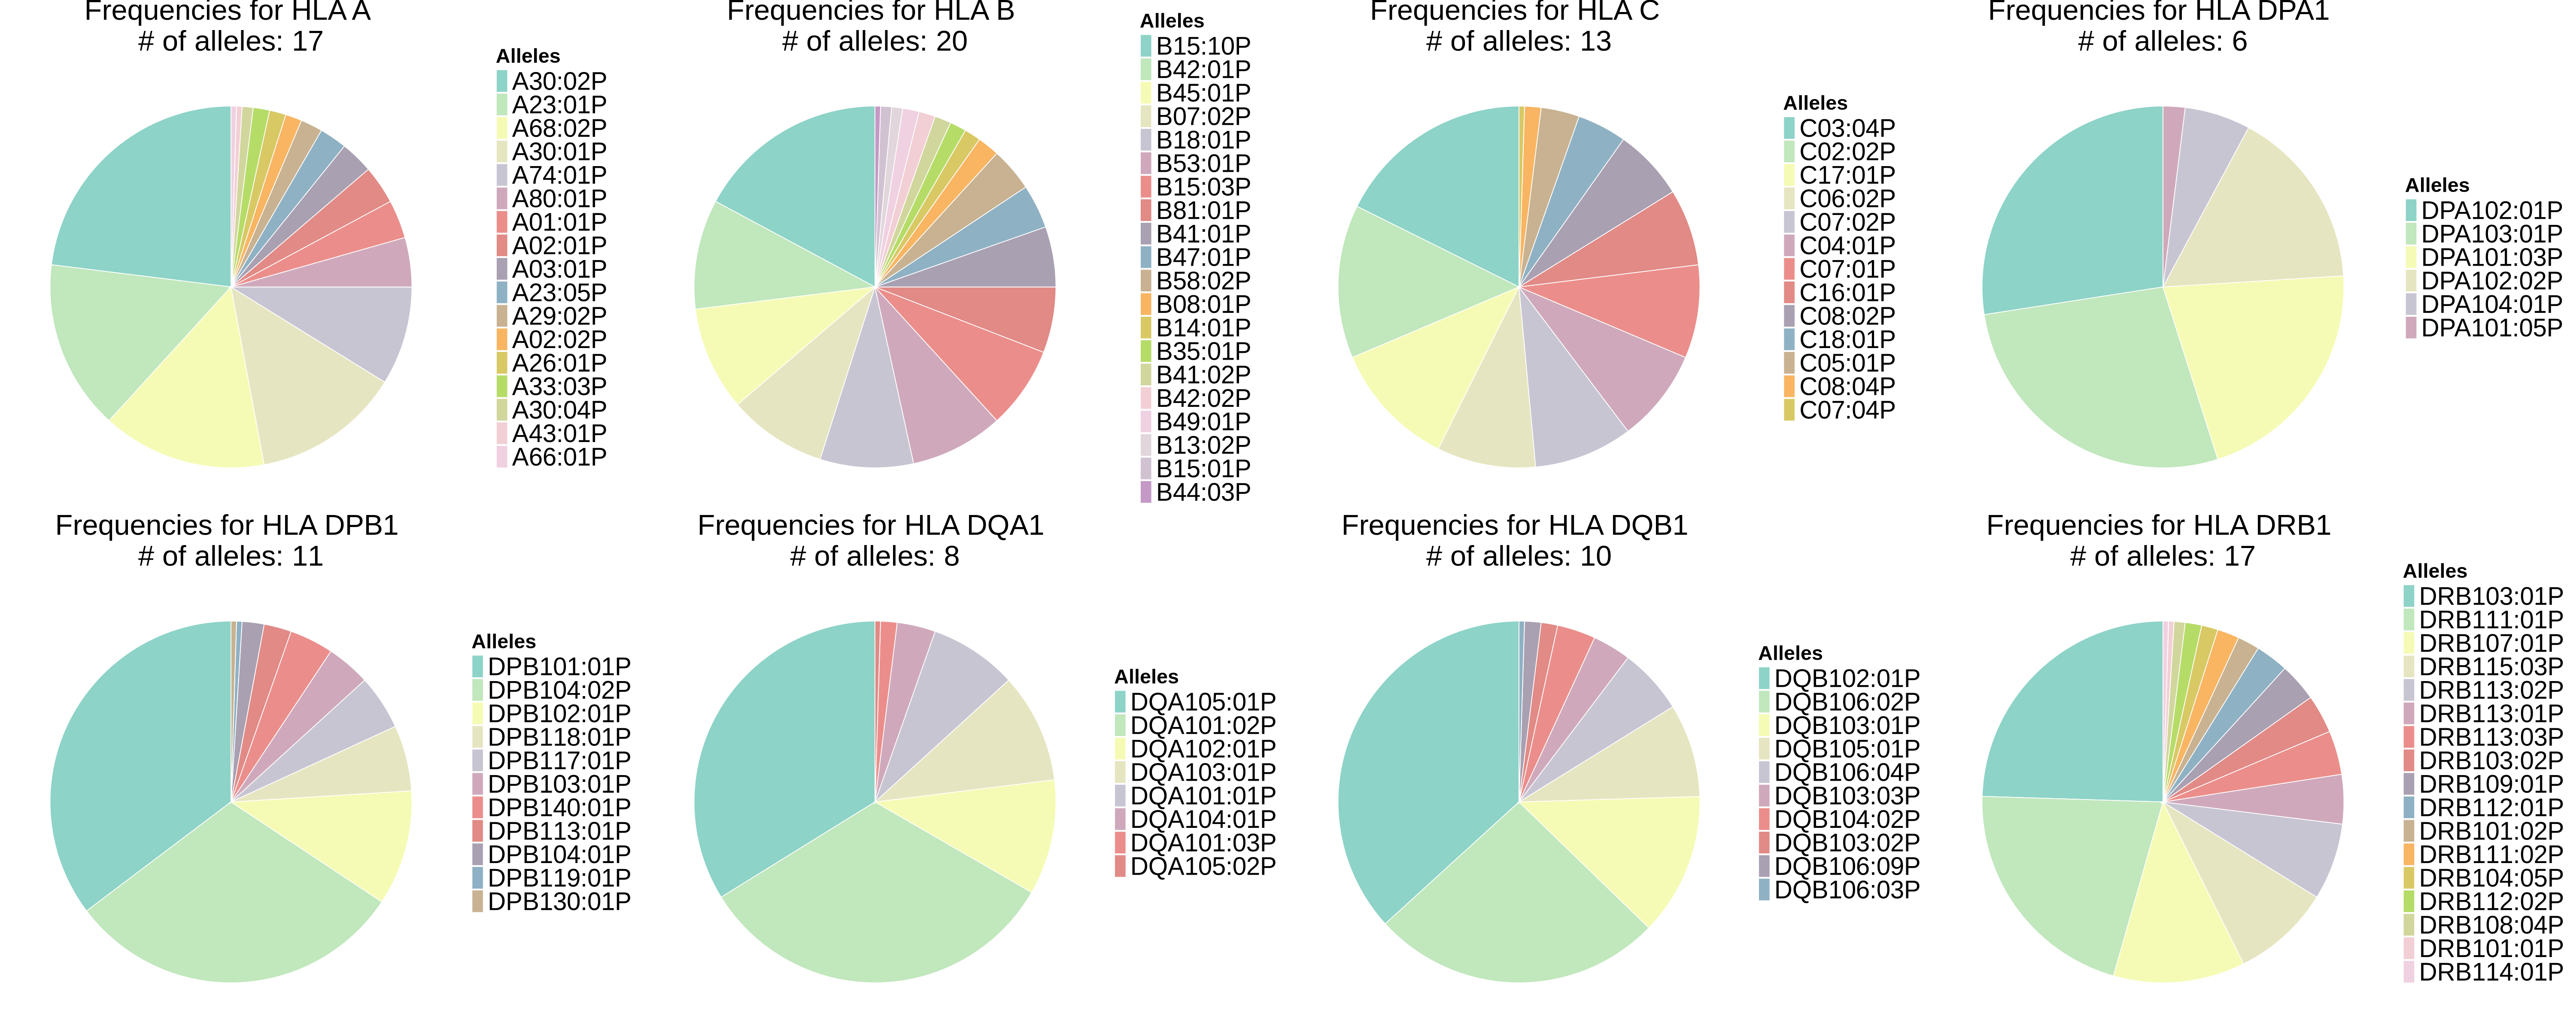

In [63]:
###just unrelateds###
load("Himba_allele_freqs_dfs.RData")
library(ggplot2)
library(gridExtra)
library(RColorBrewer) 
library(cowplot)
plot_list <- list()                                                                                              
custom_colors_ <- colorRampPalette(brewer.pal(12, "Set3"))(25)
for (i in seq_along(dfs)) {
  df <- dfs[[i]]
  HLA <- as.data.frame(table(unlist(df)))
  # Remove specific allele set to a random string
  HLA <- HLA[!HLA$Var1 == "cghiIdSm7uDcj",]
  col_name <- paste0(names(dfs)[i])
  colnames(HLA) <- c("Allele_", "Frequency")
  HLA <- HLA[order(HLA$Frequency, decreasing = TRUE), ]
  HLA$Allele_ <- factor(HLA$Allele_, levels = HLA$Allele_)
  # Generate a custom color palette
  custom_colors <- custom_colors_[1:nrow(HLA)]
  pie_chart <- ggplot(HLA, aes(x = "", y = Frequency, fill = Allele_)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  scale_fill_manual(values = custom_colors) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title.y = element_blank(),
    axis.title.x = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(0, 4), "cm"),
    plot.title = element_text(size = 40, hjust = 0.5),
    legend.position = "none"  # Remove legend from the plot
  ) +
  labs(fill = "HLA Alleles") +  # Set legend title
  ggtitle(paste("Frequencies for HLA", col_name, "\n# of alleles:", nrow(HLA)))  # Two-line title

# Extract legend with a custom title and larger text size
legend <- get_legend(ggplot(HLA, aes(x = "", y = Frequency, fill = Allele_)) +
                       geom_bar(stat = "identity", width = 1, color = "white") +
                       scale_fill_manual(values = custom_colors) +
                       theme_minimal() +
                       theme(
                         legend.position = "right",
                         legend.title = element_text(size = 28, face = "bold"),  # Change legend title font size and style
                         legend.text = element_text(size = 35)  # Make legend text bigger
                       ) +
                       labs(fill = "Alleles"))  # Set legend title

  # Combine plot and legend using plot_grid
  combined_plot <- plot_grid(pie_chart, legend, ncol = 2, rel_widths = c(1, 0.4))
  
  plot_list[[i]] <- combined_plot
  HLA$pop <- "Himba"
  HLA$prop <- round(HLA$Frequency / sum(HLA$Frequency),3)
  assign(paste0(col_name, "_freq"), HLA[,c("Allele_", "prop", "pop")])
}

# Set up the overall plot size
options(repr.plot.width = 50, repr.plot.height = 20)

# Arrange the plots in a 2x4 grid
grid.arrange(grobs = plot_list, ncol = 4) 

In [64]:
Himba_A <- nrow(A_freq)
Himba_B <- nrow(B_freq)
Himba_C <- nrow(C_freq)
Himba_DPA1 <- nrow(DPA1_freq)
Himba_DPB1 <- nrow(DPB1_freq)
Himba_DQA1 <- nrow(DQA1_freq)
Himba_DQB1 <- nrow(DQB1_freq)
Himba_DRB1 <- nrow(DRB1_freq)
####Read in subsaharan african populations allele freq info (only have class 1 data)
sub_saharan_A <- read.table("sub_saharan_A.csv", sep=",", header=TRUE)
sub_saharan_A <- sub_saharan_A[2:nrow(sub_saharan_A),c(1,3:12)]

sub_saharan_B <- read.table("sub_saharan_B.csv", sep=",", header=TRUE)
sub_saharan_B <- sub_saharan_B[2:nrow(sub_saharan_B),c(2:12)]

sub_saharan_C <- read.table("sub_saharan_C.csv", sep=",", header=TRUE)
sub_saharan_C <- sub_saharan_C[2:nrow(sub_saharan_C),c(2:12)]

##
pops <- c("Himba", "Baka", "Mbuti", "Datooga", "Iraqw", "Dogon", "Fulani", "Hadza", "Nama", "\u2021Khomani", "Ga-Adangbe")
sample_sizes <- c(102, 20, 18, 18, 12, 44, 14, 44, 72, 78, 169) 
A_num_unique_rows <- c(Himba_A)
B_num_unique_rows <- c(Himba_B)
C_num_unique_rows <- c(Himba_C)
for (i in 1:10)
    {
    df_A <- as.data.frame(sub_saharan_A[1+i])
    df_B <- as.data.frame(sub_saharan_B[1+i])
    df_C <- as.data.frame(sub_saharan_C[1+i])
    A_num_unique_rows <- c(A_num_unique_rows, length(df_A[!df_A == ""]))
    B_num_unique_rows <- c(B_num_unique_rows, length(df_B[!df_B == ""]))
    C_num_unique_rows <- c(C_num_unique_rows, length(df_C[!df_C == ""]))
    }


A_df <- data.frame(pop = pops, num_unique_rows = A_num_unique_rows, sample_size = sample_sizes)
B_df <- data.frame(pop = pops, num_unique_rows = B_num_unique_rows, sample_size = sample_sizes)
C_df <- data.frame(pop = pops, num_unique_rows = C_num_unique_rows, sample_size = sample_sizes)
DPA1_df <- data.frame(pop = c("Himba"), num_unique_rows = Himba_DPA1, sample_size = c(102))
DPB1_df <- data.frame(pop = c("Himba"), num_unique_rows = Himba_DPB1, sample_size = c(102))
DQA1_df <- data.frame(pop = c("Himba"), num_unique_rows = Himba_DQA1, sample_size = c(102))
DQB1_df <- data.frame(pop = c("Himba"), num_unique_rows = Himba_DQB1, sample_size = c(102))
DRB1_df <- data.frame(pop = c("Himba"), num_unique_rows = Himba_DRB1, sample_size = c(102))


In [65]:
##load other worlwide pops data
load("IHWG_p_group_all.RData")

for (i in seq_along(global_list)) {
  df <- global_list[[i]] 
  # Remove rows where pop is "Himba"
  df <- df[df$pop != "Himba", ]
 # Update the dataframe in global_list with the modified dataframe
  global_list[[i]] <- df
}


In [66]:
pops <- unique(rbind(global_list[[1]], global_list[[2]], global_list[[3]],
            global_list[[4]], global_list[[5]], global_list[[6]], global_list[[7]], global_list[[8]])$pop)

i <- 1
locus_sample_sizes <- list()
while(i < 9){
       result_df <- data.frame(pop = character(), num_unique_rows = numeric(), sample_size = numeric(), stringsAsFactors = FALSE)
for(pop in pops){
   global_list_ <- global_list[[i]]

  if(pop %in% global_list_$pop){
    
    # Get the sample size from IHWG and the number of alleles that are not at prop 0
     subset_pop <- global_list_[global_list_$pop == pop, ]
     num_unique <- nrow(subset_pop[!subset_pop$prop == 0,]) 
      sum_ <- sum(subset_pop[!subset_pop$prop == 0,"prop"])
      #if(sum_ != 1) {print(sum_); print(pop)}
      #print(sum_)
     sample_size <- unique(subset_pop$n)
    sample_size <- as.numeric(gsub(",", "", sample_size))
  }

 if(!pop %in% c(global_list_$pop)){
               
      next
    }
    # Store the population, count of unique rows, and sample size
  result_df <- rbind(result_df, data.frame(pop = pop, num_unique_rows = num_unique, sample_size = sample_size))
    locus_sample_sizes[[i]] <- result_df
}
    i <- i + 1
}
african <-  c('Moroccan 98','Metalsa','Chaouya','Algerian 99','Moroccan 99','North America (Af)','Doggon','Rwandan','Kenyan Highlander',
              'Kenyan Lowlander','Kenyan 142','Mandenka','Shona','Ugandan','Zambian','Zulu',
              "Himba", "Baka", "Mbuti", "Datooga", "Iraqw", "Dogon", "Fulani", "Hadza", "Nama", "\u2021Khomani", "Ga-Adangbe")
         

In [67]:
##bind the IHWG pops to the subsaharan african pops
for (i in seq_along(locus_sample_sizes)) {
  # Extract the current data frame
  df <- locus_sample_sizes[[i]]
  
  # Apply gsub to the 'pop' column
  df$pop <- gsub(" _IHWG", "", df$pop)
  
  # Update the data frame in the list
  locus_sample_sizes[[i]] <- df
}

A <- locus_sample_sizes[[1]]

A <- rbind(A, A_df)

B <- locus_sample_sizes[[2]]
B <- rbind(B, B_df)

C <- locus_sample_sizes[[3]]
C <- rbind(C, C_df)

DRB1 <- locus_sample_sizes[[4]]
DRB1 <- rbind(DRB1, DRB1_df)

DQA1  <- locus_sample_sizes[[5]]
DQA1 <- rbind(DQA1, DQA1_df)

DQB1  <- locus_sample_sizes[[6]]
DQB1 <- rbind(DQB1, DQB1_df)


DPA1  <- locus_sample_sizes[[7]]
DPA1 <- rbind(DPA1, DPA1_df)

DPB1  <- locus_sample_sizes[[8]]
DPB1 <- rbind(DPB1, DPB1_df)



`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


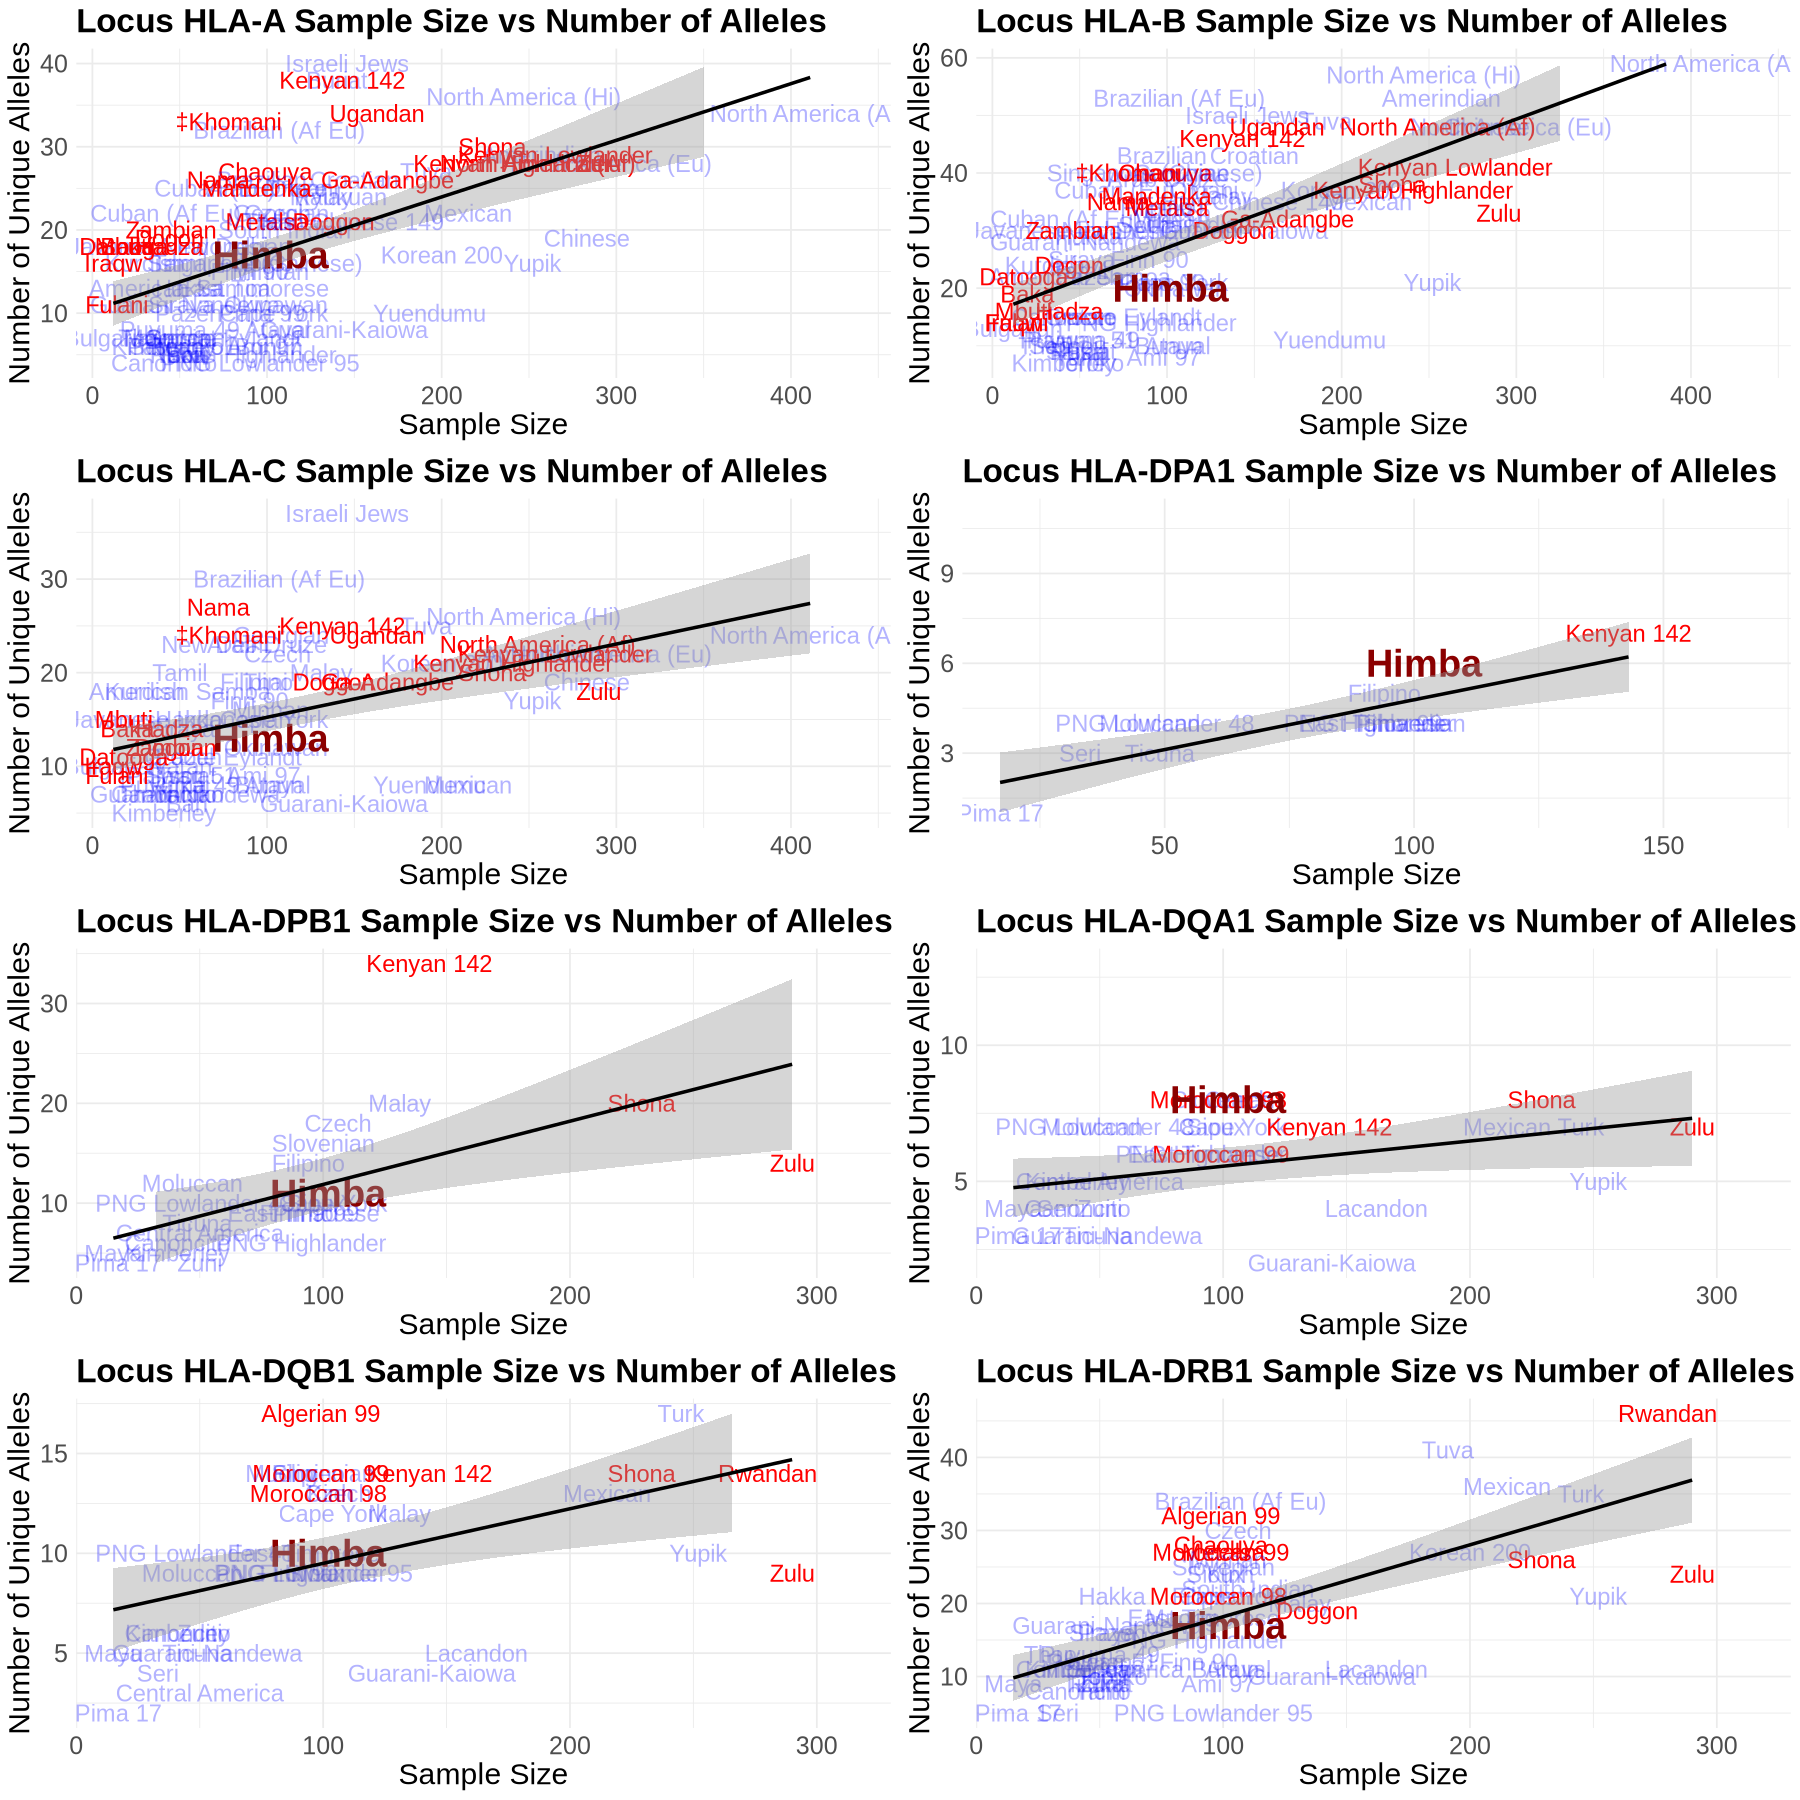

In [68]:
library(ggplot2)
library(gridExtra)

# Create an empty list to store plots
plot_list <- list()

# Define the locus names
locus_names <- c("HLA-A", "HLA-B", "HLA-C", "HLA-DPA1", "HLA-DPB1", "HLA-DQA1", "HLA-DQB1", "HLA-DRB1")
list_ <- list(A, B, C, DPA1, DPB1, DQA1, DQB1, DRB1)

for (i in 1:8) {
  # Extract the current data frame
  df <- list_[[i]]
  locus <- locus_names[i]  # Get the corresponding locus name
  # Remove commas and convert to numeric
  df$sample_size <- as.numeric(gsub(",", "", df$sample_size))
  df <- df[df$sample_size < 500, ]
  
  # Identify rows where values are NA or missing
  missing_values <- df[is.na(df$sample_size) | is.na(df$num_unique_rows), ]
  if (nrow(missing_values) > 0) {
    print(paste("Missing values in locus", locus, ":"))
    print(missing_values)
  }

  # Determine the color based on whether the population is in the 'african' vector or is "Himba"
  df$point_color <- ifelse(df$pop == "Himba", "darkred", ifelse(df$pop %in% african, "red", "blue"))
  
  # Assign point sizes based on population
  df$point_size <- ifelse(df$pop == "Himba", 20, 15)  # Larger size for Himba, smaller for others
  
  himba <- df[df$pop == "Himba", "num_unique_rows"]
  
  # Ensure the Himba point is included in axis limits calculation
  x_limits <- range(c(df$sample_size), max(df$sample_size + 25), na.rm = TRUE)
  y_limits <- range(c(df$num_unique_rows, himba + 5), na.rm = TRUE)
  
  # Print out rows that are outside the range for x and y axes (based on the calculated limits)
  out_of_range_x <- df[df$sample_size < min(x_limits) | df$sample_size > max(x_limits), ]
  out_of_range_y <- df[df$num_unique_rows < min(y_limits) | df$num_unique_rows > max(y_limits), ]
  
  if (nrow(out_of_range_x) > 0) {
    print(paste("Rows with sample_size out of range in locus", locus, ":"))
    print(out_of_range_x)
  }
  if (nrow(out_of_range_y) > 0) {
    print(paste("Rows with num_unique_rows out of range in locus", locus, ":"))
    print(out_of_range_y)
  }
# Create a new column for text size based on population
df$text_size <- ifelse(df$pop == "Himba", 8, 5)  # Larger size for Himba

p <- ggplot(df, aes(x = sample_size, y = num_unique_rows)) +
  # Plot the population labels for all points with transparency for blue points
  geom_text(aes(label = pop, 
                color = point_color,
                fontface = ifelse(pop == "Himba", "bold", "plain")),  
            size = df$text_size,  # Use the new column for size
            alpha = ifelse(df$point_color == "blue", 0.3, 1)) +  # Make Himba points bold and larger
  
  # Extrapolated regression line
  geom_smooth(data = df[!df$pop == "Himba",], method = "lm", se = TRUE, color = "black", linetype = "solid") +
  
  # Labels and title
  labs(title = paste("Locus", locus, "Sample Size vs Number of Alleles"),
       x = "Sample Size",
       y = "Number of Unique Alleles") +
  theme_minimal() +
  scale_color_identity() +  # Use the actual colors defined in point_color
  xlim(x_limits) +
  ylim(y_limits) +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title.x = element_text(size = 18),
    axis.title.y = element_text(size = 18),
    axis.text = element_text(size = 15),
    legend.text = element_text(size = 15)
  )

  
  # Add the plot to the list
  plot_list[[i]] <- p
}

# Set plot dimensions
options(repr.plot.width = 15, repr.plot.height = 15)

# Arrange the first half of the plots in a 4x2 grid (with legend)
grid.arrange(grobs = lapply(plot_list, function(p) p + theme(legend.position = "none")), ncol = 2)

